## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/My Drive/HW1

/content/drive/My Drive/HW1


In [115]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [116]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

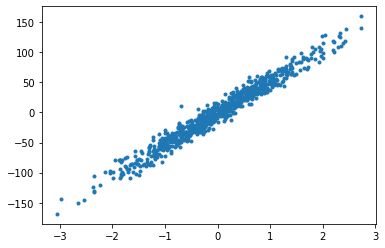

In [117]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [118]:
class Linear_Regression:
  def __init__(self, x_train, y_train):
    self.x_train = np.reshape(x_train, x_train.size)
    self.y_train = y_train
    self.weight = 0
    self.intercept = 0
  
  def predict(self, x_train):
    y_pred = np.array([])
    for x in x_train:
      y_pred = np.append(y_pred, self.weight * x + self.intercept)
    return y_pred
  
  def calculate_loss(self, y_pred, y_train):
    return (1/y_pred.size) * np.sum(np.square(y_pred - y_train))

  def update_weight(self, y_pred):
    x_train = self.x_train
    y_train = self.y_train
    len = y_pred.size
    self.weight -= self.learning_rate * (1/len) * np.sum((y_pred - y_train) * x_train)
    self.intercept -= self.learning_rate * (1/len) * np.sum(y_pred - y_train)

  def train(self, learning_rate, iteration, training_loss):
    self.learning_rate = learning_rate
    for it in range(iteration):
      y_pred = self.predict(self.x_train)
      loss = self.calculate_loss(y_pred, self.y_train)
      training_loss.append(loss)
      self.update_weight(y_pred)
    print(self.weight, self.intercept)
    return training_loss

In [119]:
iteration = 1000
learning_rate = 0.01
training_loss = []

regressor = Linear_Regression(x_train, y_train)
training_loss = regressor.train(learning_rate, iteration, training_loss)

52.738914681987474 -0.3344012407130547


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

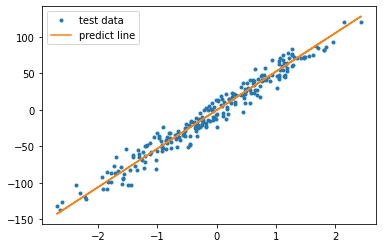

In [123]:
x_test = np.reshape(x_test, x_test.size)
y_pred = regressor.predict(x_test)
MSE = regressor.calculate_loss(y_pred, y_test)

#plt.plot(x_train, y_train, '.', label='training data')
plt.plot(x_test, y_test, '.', label='test data')
plt.plot(x_test, y_pred, '-', label='predict line')
plt.legend(loc='best')

learning rate 0.01
iteration    1000
Mean Square Error: 110.42395623279842


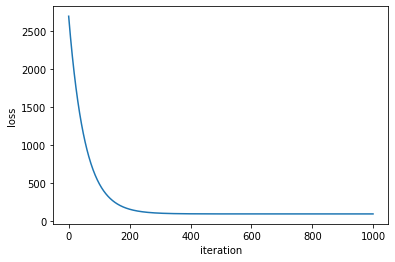

In [121]:
print("learning rate {}".format(learning_rate))
print("iteration    {}".format(iteration))
print("Mean Square Error:", MSE)

plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(iteration), training_loss)

# Part 2. Logistic regression model

## Load classification data

In [124]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

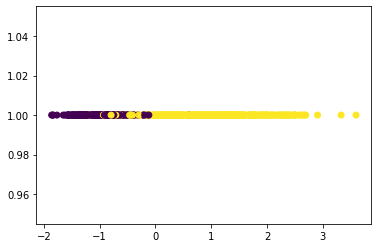

In [125]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [126]:
class Linear_Classification:
  def __init__(self, x_train, y_train):
    self.x_train = np.reshape(x_train, x_train.size)
    self.y_train = y_train
    self.weight = 0
    self.intercept = 0
  
  def sigmoid_func(self, value):
    return 1/(1 + np.exp(-value))

  def predict(self, x_train):
    y_pred = np.array([])
    H = self.sigmoid_func(self.weight * x_train + self.intercept)
    for h in H:
      if h >= 0.5:
        y_pred = np.append(y_pred, 1)
      else:
        y_pred = np.append(y_pred, 0)
    return H, y_pred
  
  def calculate_loss(self, H, y_train):
    len = H.size
    return -np.sum(y_train * np.log(H) + (1 - y_train) * np.log(1 - H)) 

  def update_weight(self, H):
    x_train = self.x_train
    y_train = self.y_train
    len = H.size
    self.weight -= self.learning_rate * (1/len) * np.sum((H - y_train) * x_train)
    self.intercept -= self.learning_rate * (1/len) * np.sum(H - y_train)

  def train(self, learning_rate, iteration, training_loss):
    self.learning_rate = learning_rate
    for it in range(iteration):
      H, y_pred = self.predict(self.x_train)
      H = np.reshape(H, H.size)
      loss = self.calculate_loss(H, self.y_train)
      training_loss.append(loss)
      self.update_weight(H)
    print(self.weight, self.intercept)
    return training_loss, self.weight, self.intercept

In [112]:
iteration = 5000
learning_rate = 0.03
training_loss = []

classifier = Linear_Classification(x_train, y_train)
training_loss, weight, intercept = classifier.train(learning_rate, iteration, training_loss)

4.1853007504791515 1.2927037660900267


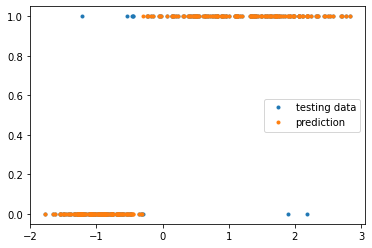

In [129]:
H, y_pred = classifier.predict(np.reshape(x_test, x_test.size))
CEE = classifier.calculate_loss(H, y_test)

#plt.plot(x_train, y_train, '.', label='training data')
plt.plot(x_test, y_test, '.', label='testing data')
plt.plot(x_test, y_pred, '.', label='prediction')
plt.legend(loc='best')

learning rate 0.01
iteration    1000
Cross Entropy Error: 45.3524718375564


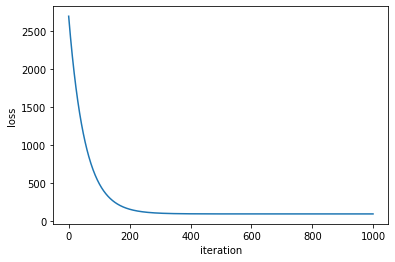

In [128]:
print("learning rate {}".format(learning_rate))
print("iteration    {}".format(iteration))
print("Cross Entropy Error:", CEE)

plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(iteration), training_loss)